In [1]:
import tensorflow as tf
import tqdm
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cv2

import util

## Trying out the mobilenet model

In [2]:
# not sure why this or other variations dont work
#from tensorflow import keras.applications.mobilenet as mobilenet
mobilenet = tf.keras.applications.mobilenet

In [3]:
mob_net = mobilenet.MobileNet(weights='imagenet') #, include_top=False, pooling='avg')

In [5]:
img = util.read_image_as_nparr_RGB('./images/elephant.jpeg', shape = (224, 224))

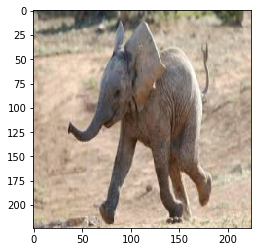

In [6]:
plt.imshow(img)
plt.show()

In [38]:
def rotateImage(image, angle):
    n_rows, n_cols = image.shape[:2]
    rot_mat = cv2.getRotationMatrix2D((n_rows/2, n_cols/2), angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, (n_rows, n_cols))
    return result

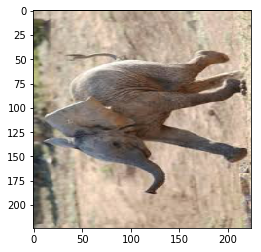

In [44]:
rot_img = rotateImage(img, 90)
plt.imshow(rot_img)
plt.show()

In [7]:
print(img.shape)
print(np.expand_dims(img, axis=0).shape)

(224, 224, 3)
(1, 224, 224, 3)


In [8]:
img.shape

(224, 224, 3)

In [9]:
img_pp = mobilenet.preprocess_input(np.expand_dims(img.copy().astype('float'), axis=0))

In [10]:
img_pp.shape

(1, 224, 224, 3)

In [11]:
preds = mob_net.predict(img_pp)
mobilenet.decode_predictions(preds)

[[('n01871265', 'tusker', 0.41080126),
  ('n02504013', 'Indian_elephant', 0.24512713),
  ('n02395406', 'hog', 0.17658336),
  ('n02504458', 'African_elephant', 0.061307561),
  ('n02397096', 'warthog', 0.049183145)]]